In [2]:
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon

code_iris = pd.read_csv(r"/Users/antoineclaverie-rospide/Downloads/reference_IRIS_geo2021.csv")
print(code_iris)


       CODE_IRIS                                      LIB_IRIS TYP_IRIS  \
0      010010000  L'Abergement-Clémenciat (commune non irisée)        Z   
1      010020000    L'Abergement-de-Varey (commune non irisée)        Z   
2      010040101             Les Pérouses-Triangle d'Activités        H   
3      010040102                                 Longeray-Gare        H   
4      010040201                Centre-Saint-Germain-Vareilles        H   
...          ...                                           ...      ...   
49401  976170301                                 Combani Ouest        H   
49402  976170302                                   Combani Est        H   
49403  976170303                            Tsingoni-Sud Épars        D   
49404  976170304                           Tsingoni-Nord Épars        D   
49405  976170400                                      Miréréni        H   

      GRD_QUART DEPCOM                   LIBCOM UU2020  REG  DEP  
0       0100100  01001  L'Aberge

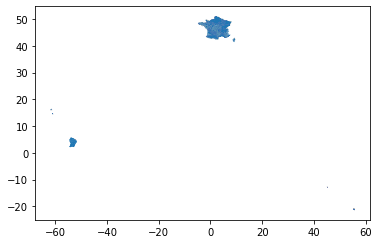

In [4]:
iris_fra = gpd.read_file(r"/Users/antoineclaverie-rospide/IRIS_FRA/CONTOURS-IRIS.shp")
iris_fra = iris_fra.to_crs(4326)
iris_glp = gpd.read_file(r"/Users/antoineclaverie-rospide/IRIS_GLP/CONTOURS-IRIS.shp")
iris_glp = iris_glp.to_crs(4326)
iris_guf = gpd.read_file(r"/Users/antoineclaverie-rospide/IRIS_GUF/CONTOURS-IRIS.shp")
iris_guf = iris_guf.to_crs(4326)
iris_mtq = gpd.read_file(r"/Users/antoineclaverie-rospide/IRIS_MTQ/CONTOURS-IRIS.shp")
iris_mtq = iris_mtq.to_crs(4326)
iris_myt = gpd.read_file(r"/Users/antoineclaverie-rospide/IRIS_MYT/CONTOURS-IRIS.shp")
iris_myt = iris_myt.to_crs(4326)
iris_reu = gpd.read_file(r"/Users/antoineclaverie-rospide/IRIS_REU/CONTOURS-IRIS.shp")
iris_reu = iris_reu.to_crs(4326)

liste_iris = [iris_fra, iris_glp, iris_guf, iris_guf, iris_mtq, iris_myt, iris_reu]

iris = gpd.GeoDataFrame(pd.concat(liste_iris, ignore_index=True),crs=4326)

iris.head()
iris.plot()

#polygon_iris.describe()

import csv
iris_order = iris.sort_values(by=["CODE_IRIS"], ascending=True)

###iris_order['geometry'] = gpd.GeoSeries.from_wkt(iris_order['geometry'])
###iris_order = gpd.GeoDataFrame(iris_order, geometry='geometry')

iris_order = iris_order.rename(columns={'geometry': 'CONTOUR_IRIS', 'TYP_IRIS': 'TYPE_IRIS'})
iris_order.head()
iris_order.to_csv('contours_iris_full.csv', index = False, sep='|')



In [48]:
from shapely.geometry import Point, Polygon

#print(polygon_iris.head)

iris_order = polygon_iris.sort_values(by=["CODE_IRIS"], ascending=True)
#iris_order = iris_order.rename(columns={'geometry': 'CONTOUR_IRIS', 'TYP_IRIS': 'TYPE_IRIS'})
#iris_order.head()

<bound method NDFrame.describe of 12906    False
14248    False
16417    False
2774     False
47402    False
         ...  
30473    False
23283    False
41502    False
11928    False
18218    False
Length: 48589, dtype: bool>

In [47]:
import csv
iris_order = polygon_iris.sort_values(by=["CODE_IRIS"], ascending=True)

###iris_order['geometry'] = gpd.GeoSeries.from_wkt(iris_order['geometry'])
###iris_order = gpd.GeoDataFrame(iris_order, geometry='geometry')

iris_order = iris_order.rename(columns={'geometry': 'CONTOUR_IRIS', 'TYP_IRIS': 'TYPE_IRIS'})
iris_order.head()
iris_order.to_csv('contours_iris.csv', index = False, sep='|')

In [11]:
import fiona

with fiona.open(r"/Users/antoineclaverie-rospide/CONTOURS-IRIS.shp") as reader:
        properties = reader.meta["schema"]["properties"]
        srid = reader.meta["crs"]["init"]
        # on vérifie que le nom des champs sont conformes

        data = [row["properties"] for row in reader]
        df = pd.DataFrame(data)

df.to_csv('test.csv', index = False)

In [38]:
merge_iris = code_iris.merge(polygon_iris, left_on='CODE_IRIS', right_on='CODE_IRIS')
merge_iris.head()
del merge_iris['TYP_IRIS_y']


In [43]:
print(merge_iris.geometry.dtypes)
polygon_iris.to_csv('contours_iris.csv', index = False)


geometry
